# Subplots

In [1]:
%matplotlib notebook
import matplotlib.gridspec as gridspec
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Return a subplot axes positioned by the given grid definition.

Typical call signature:

  subplot(nrows, ncols, plot_number)

<IPython.core.display.Javascript object>


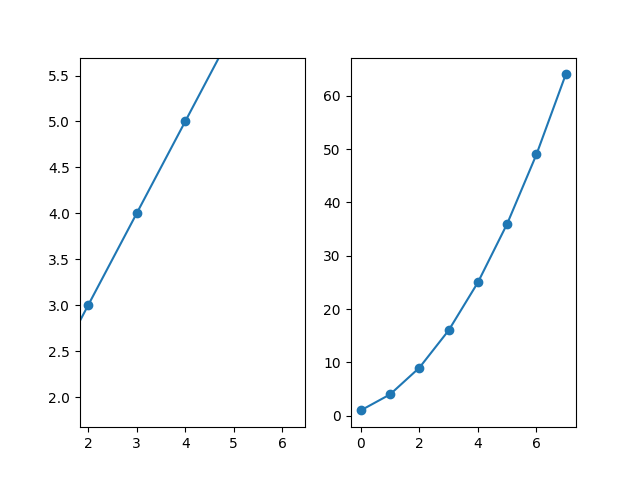

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

lines = plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
lines = plt.plot(exponential_data, '-o')

In [5]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
lines = plt.plot(exponential_data, '-x')

The previous code will update the first plot if this is run in a browser.

## Sharing the y-axis

The exponential and linear plots don't look as different as they should because they have different heights. To make them comparable, you can have two sub-plots share the same y-axis.

<IPython.core.display.Javascript object>


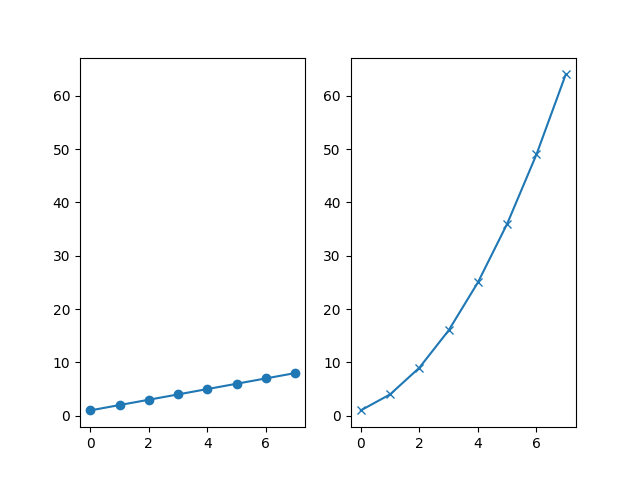

In [6]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
lines = plt.plot(exponential_data, '-x')

## Alternate subplot syntax

Matplotlib also lets you pass in the number of rows, number of columns, and the current subplot as a single number rather than a comma-separated tuple.

<IPython.core.display.Javascript object>


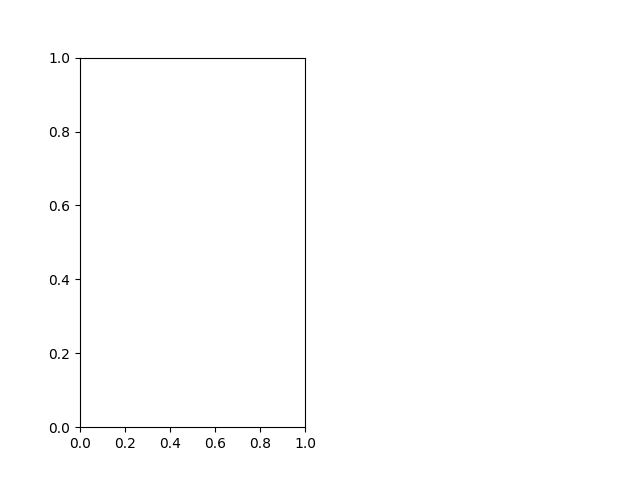

True

In [7]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

## Subplots vs subplot

Instead of creating the axes one at a time you can use the *subplots* function to create them all at once.

Signature:
plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)

Docstring:
Create a figure and a set of subplots

<IPython.core.display.Javascript object>


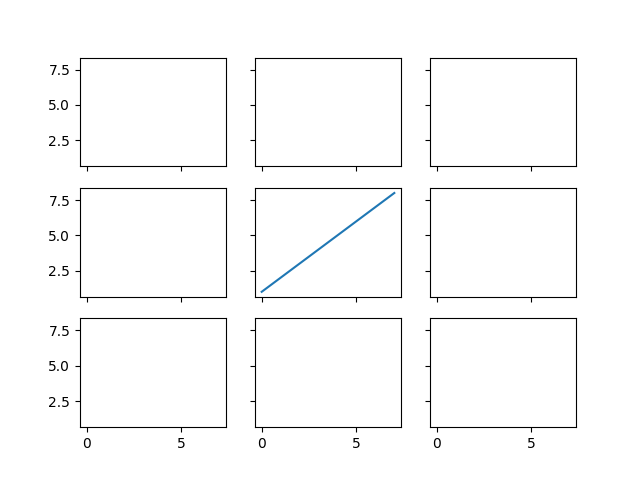

In [8]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
lines = ax5.plot(linear_data, '-')

The axes are returned as a tuple of tuples, each tuple representing a row in the grid.

<IPython.core.display.Javascript object>


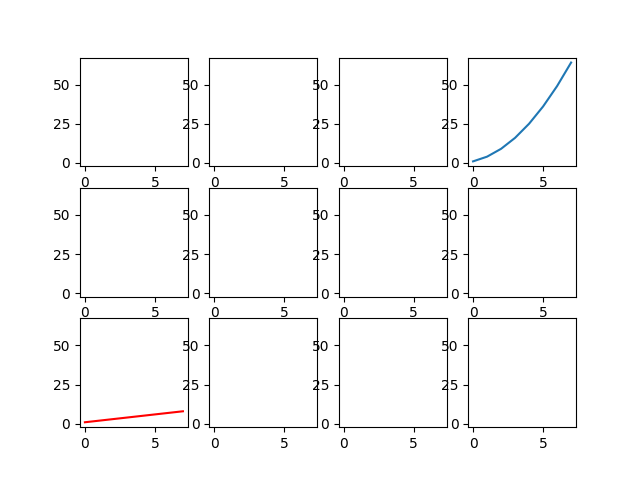

In [9]:
figure, (top, middle, bottom) = plt.subplots(3, 4, sharex=True, sharey=True)
lines = top[-1].plot(exponential_data)
lines = bottom[0].plot(linear_data, color='r')

In [10]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [11]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


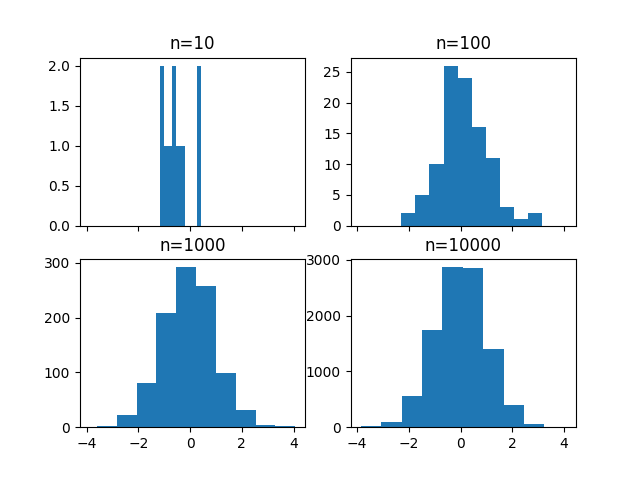

In [13]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

The default number of bins is stored in the *rcParams* dictionary.

In [14]:
matplotlib.rcParams["hist.bins"]

10

The default number of bins is 10, which means the fourth sub-plot has 1,000 times more data than bins.

<IPython.core.display.Javascript object>


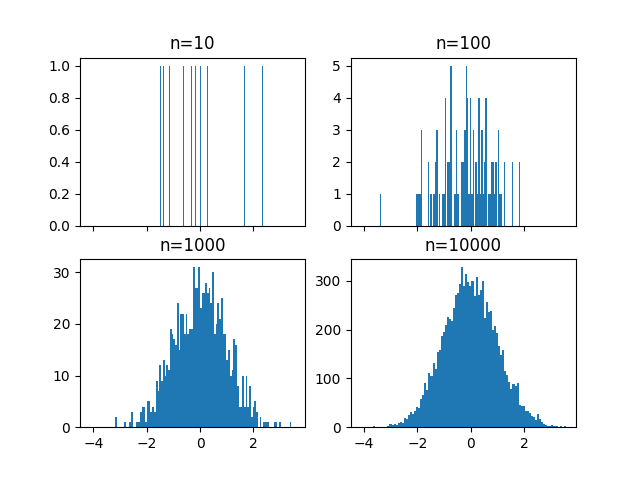

In [15]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


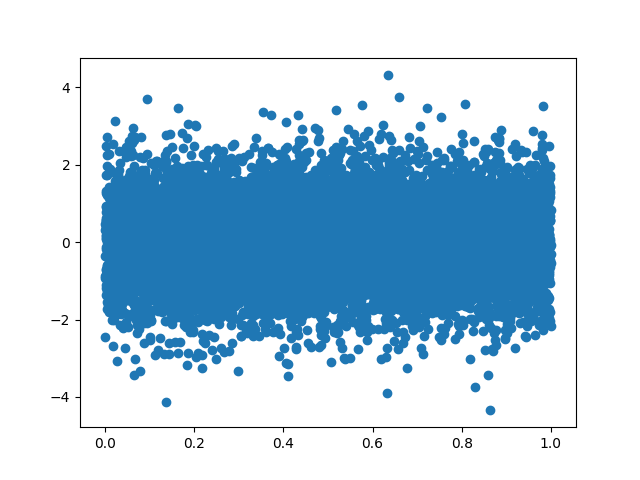

In [16]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
collection = plt.scatter(X,Y)

## gridspec vs subplots

Yet another way to create subplots with matplotlib. GridSpec allows you to control the location of the sub-plots.

Init signature:

gridspec.GridSpec(nrows, ncols, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)

Docstring:     
A class that specifies the geometry of the grid that a subplot
will be placed. The location of grid is determined by similar way
as the SubplotParams.

You can also use the convenience function =plt.subplot2grid=.

Signature: plt.subplot2grid(shape, loc, rowspan=1, colspan=1, **kwargs)

Docstring:
Create a subplot in a grid.  The grid is specified by *shape*, at
location of *loc*, spanning *rowspan*, *colspan* cells in each
direction.  The index for loc is 0-based. ::

  subplot2grid(shape, loc, rowspan=1, colspan=1)

is identical to ::

  gridspec=GridSpec(shape[0], shape[1])
  subplotspec=gridspec.new_subplotspec(loc, rowspan, colspan)
  subplot(subplotspec)

Note that gridspec uses 0-based indexing while subplot uses 1-based indexing.

<IPython.core.display.Javascript object>


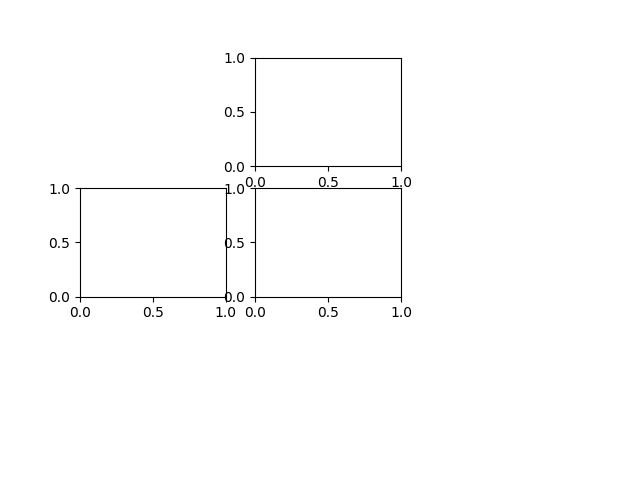

In [17]:
figure = plt.figure()
top = plt.subplot2grid((3, 3), (0, 1))
bottom_left = plt.subplot2grid((3,3), (1, 0))
bottom_right = plt.subplot2grid((3, 3), (1, 1))

<IPython.core.display.Javascript object>


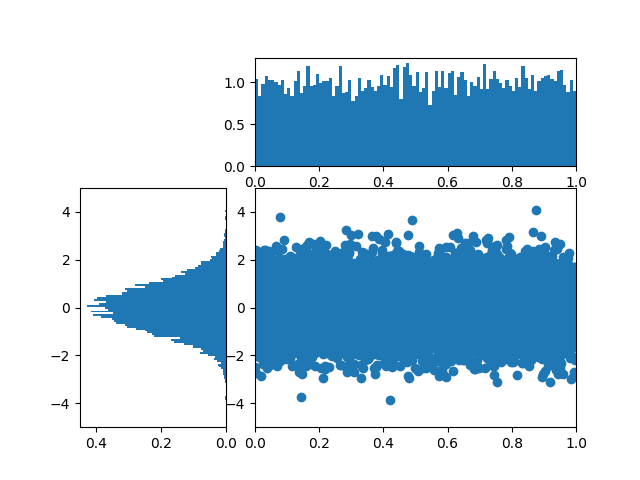

In [30]:
# use gridspec to partition the figure into subplots
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_row, bottom_row = 0, 1
left_column, right_column = 0, 1
top_histogram = plt.subplot(gspec[top_row, right_column:])
side_histogram = plt.subplot(gspec[bottom_row:, left_column])
lower_right = plt.subplot(gspec[bottom_row:, right_column:])

The next code creates a main plot with the x-data being uniform random values and the y-data being normally-distributed random values. The left plot is a histogram of the normal values and the top plot is a histogram of the uniform values.

In [31]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

## clear the histograms and plot normed histograms

In [32]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

## change axes limits

In [34]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

The next image is a plot from a study of MOOC grades vs engagement that uses similar ideas.

In [35]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [36]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [37]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.001984,0.005901,0.499472
std,1.413576,1.000546,0.290411
min,0.003095,-3.705538,0.000074
25%,0.951488,-0.668422,0.246714
50%,1.676081,0.010577,0.493311
75%,2.713521,0.684209,0.753311
max,14.130244,4.062505,0.999969


<IPython.core.display.Javascript object>


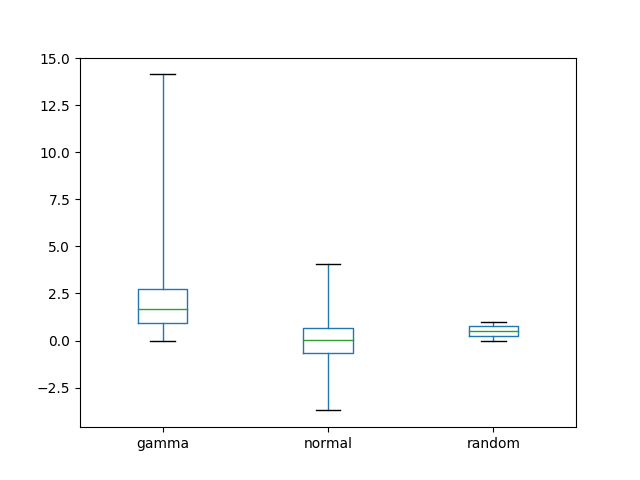

In [43]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [44]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
# _ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
axe = df.boxplot(whis="range")
axe.grid(False)

<IPython.core.display.Javascript object>


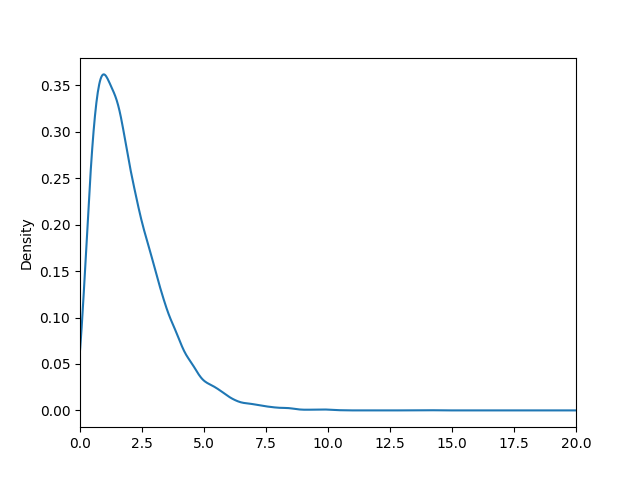

(0, 20)

In [48]:
plt.figure()
axe = df.gamma.plot(kind='kde')
axe.set_xlim(0, 20)

# Inset Grid

<IPython.core.display.Javascript object>


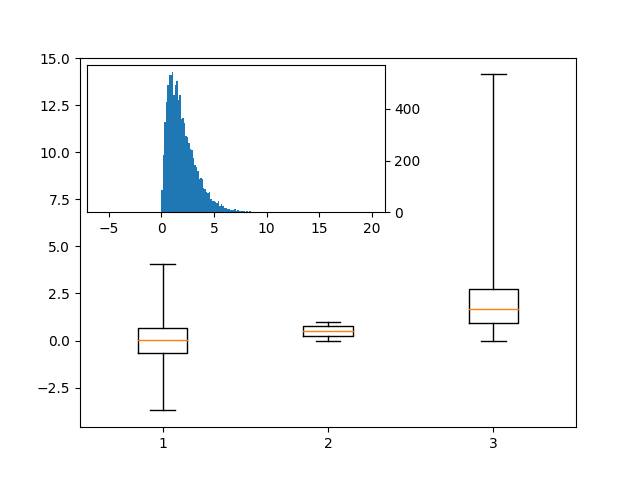

In [49]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [50]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


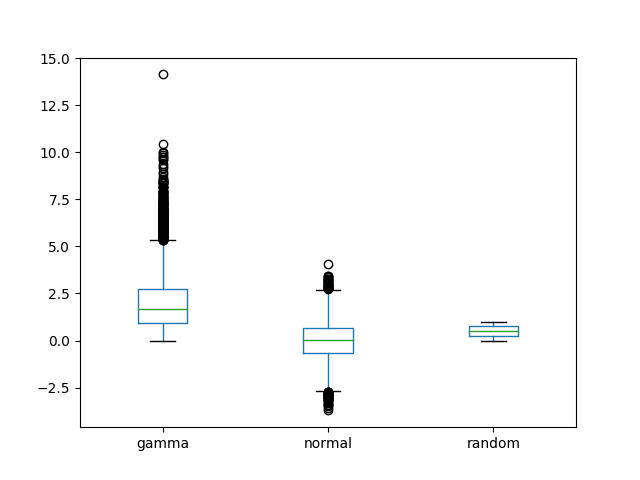

In [53]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
#_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )
axe = df.boxplot()
axe.grid(False)

# Heatmaps

<IPython.core.display.Javascript object>


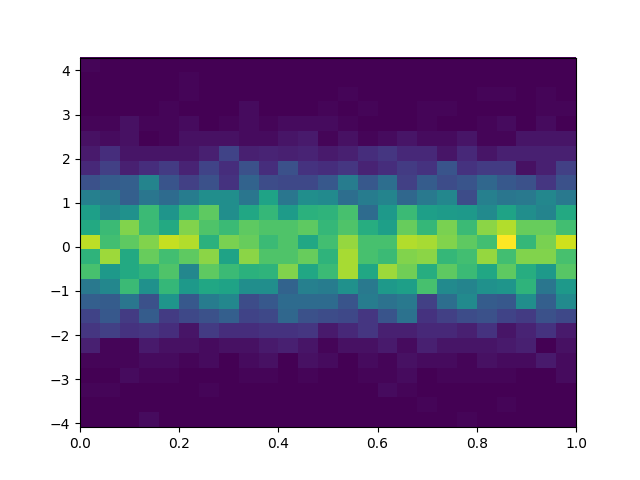

In [54]:
plt.figure(), bins=100

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


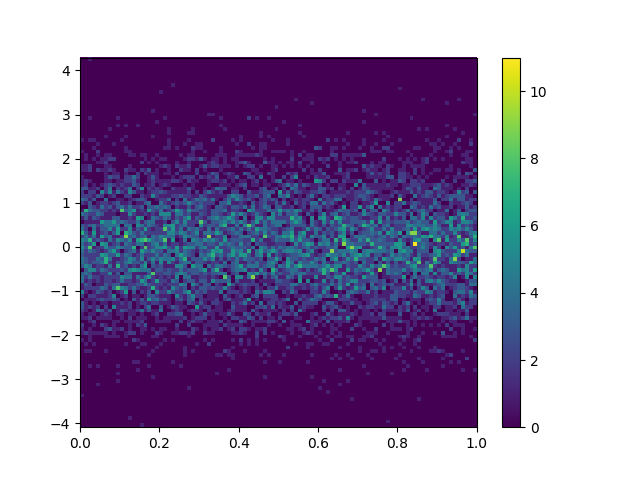

In [55]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [56]:
# add a colorbar legend
plt.colorbar()

# Animations

In [57]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [58]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


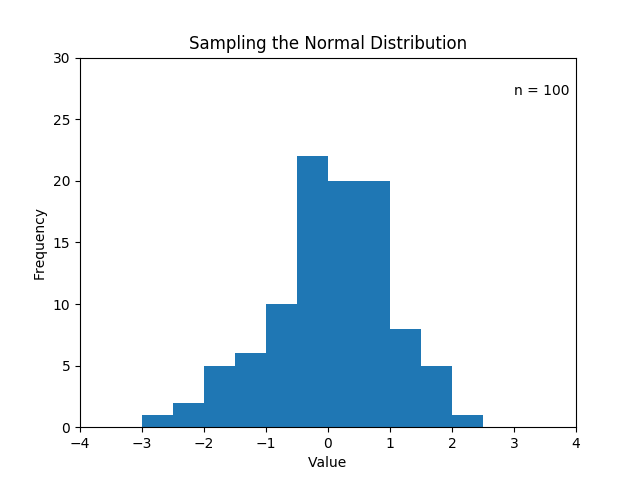

In [60]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


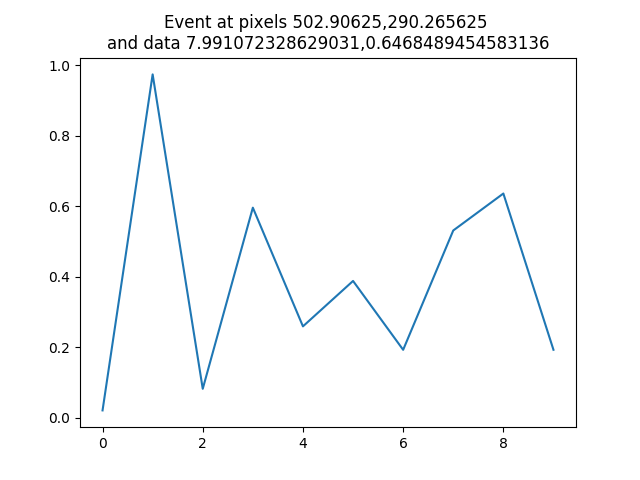

7

In [61]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla(), bins=100
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [62]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.431314,China,0.757038
1,0.046844,Brazil,0.275761
2,0.387390,Chile,0.301935
3,0.255321,India,0.104061
4,0.526568,UK,0.949437
5,0.813781,Germany,0.268231
6,0.386432,Iraq,0.519952
7,0.249595,Mexico,0.311056
8,0.212916,Canada,0.673341
9,0.140472,USA,0.682806


<IPython.core.display.Javascript object>


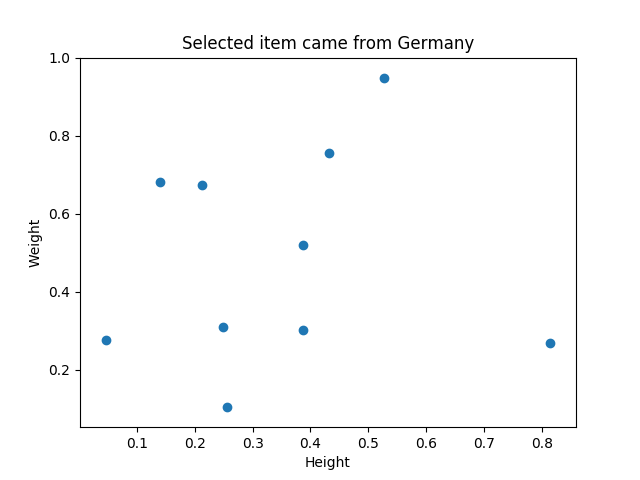

In [64]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [65]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7